In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir, r'data\donnees-historiques\prix\hourly_day_ahead_prices_2017_2020.parquet')

df = pd.read_parquet(file_path)

# Afficher les premières lignes pour comprendre la structure
print(df.head())


                           price
date                            
2016-12-31 23:00:00+00:00  58.82
2017-01-01 00:00:00+00:00  58.23
2017-01-01 01:00:00+00:00  51.95
2017-01-01 02:00:00+00:00  47.27
2017-01-01 03:00:00+00:00  45.49


In [5]:
# Vérifier et convertir la colonne d'index en datetime
df.index = pd.to_datetime(df.index)

# Sélectionner la colonne des prix
col_name = "price"  # Assurez-vous que c'est le bon nom
time_series = df[col_name].values

In [6]:

### 1️⃣ Jittering (Ajout de bruit gaussien)
def jittering(data, noise_level=0.05):
    noise = np.random.normal(0, noise_level * np.std(data), data.shape)
    return data + noise

jittered_series = jittering(time_series)

### 2️⃣ Time Warping (Déformation temporelle)
def time_warping(data, sigma=0.2):
    orig_time = np.linspace(0, 1, len(data))
    random_offsets = np.random.normal(0, sigma, len(data))
    warped_time = np.clip(orig_time + random_offsets, 0, 1)
    interpolator = interp1d(warped_time, data, kind='linear', fill_value='extrapolate')
    return interpolator(orig_time)

warped_series = time_warping(time_series)

### 3️⃣ Window Slicing (Découpe de fenêtres)
def window_slicing(data, window_size=0.8):
    start_idx = np.random.randint(0, len(data) - int(window_size * len(data)))
    end_idx = start_idx + int(window_size * len(data))
    return data[start_idx:end_idx]

sliced_series = window_slicing(time_series)

C:\Users\CYTech Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\CYTech Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


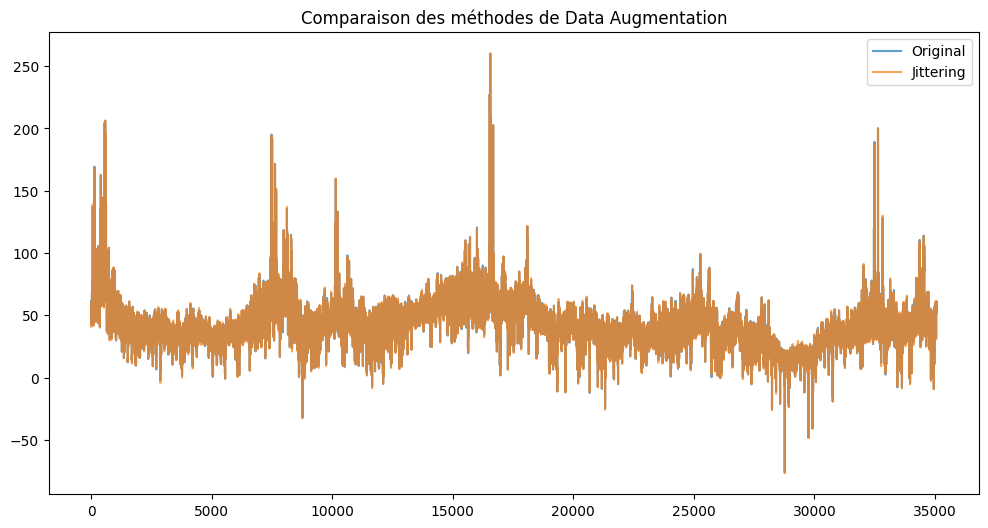

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original", alpha=0.7)
plt.plot(jittered_series, label="Jittering", alpha=0.7)
plt.legend()
plt.title("Comparaison des méthodes de Data Augmentation")
plt.show()


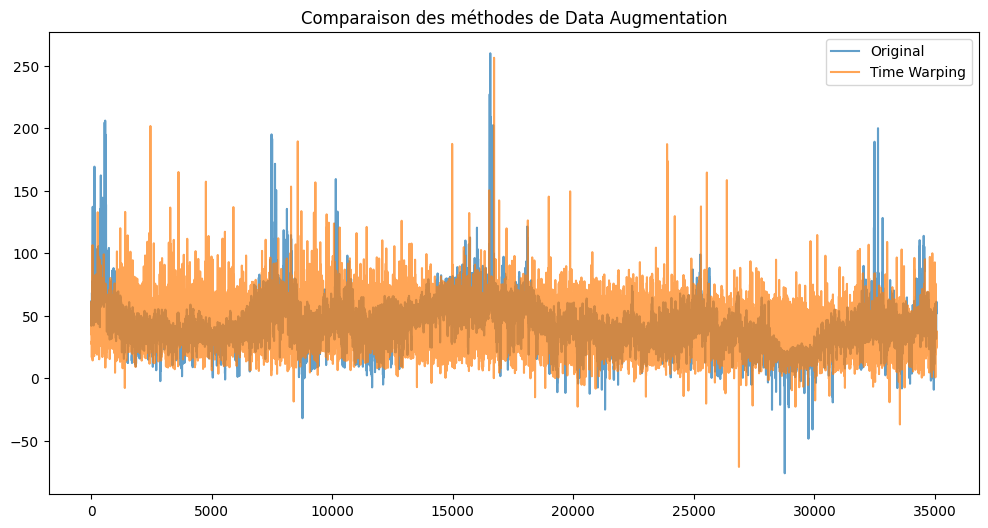

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original", alpha=0.7)
plt.plot(warped_series, label="Time Warping", alpha=0.7)
plt.legend()
plt.title("Comparaison des méthodes de Data Augmentation")
plt.show()


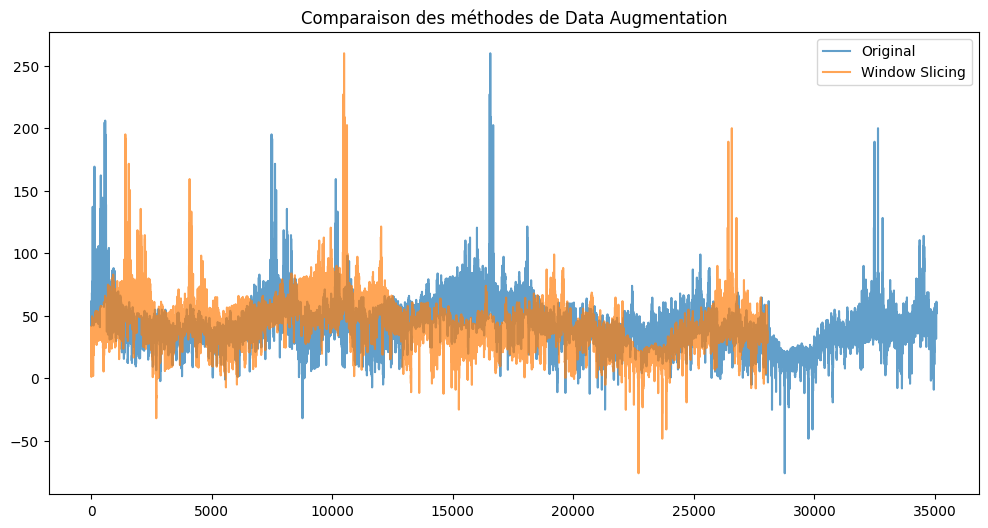

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original", alpha=0.7)
plt.plot(np.arange(len(sliced_series)), sliced_series, label="Window Slicing", alpha=0.7)
plt.legend()
plt.title("Comparaison des méthodes de Data Augmentation")
plt.show()


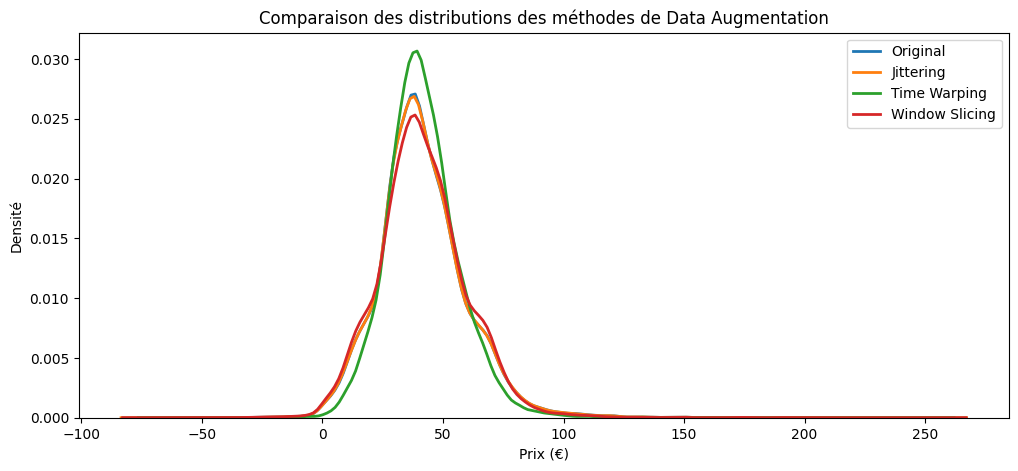

In [10]:
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.kdeplot(time_series, label="Original", lw=2)
sns.kdeplot(jittered_series, label="Jittering", lw=2)
sns.kdeplot(warped_series, label="Time Warping", lw=2)
sns.kdeplot(sliced_series, label="Window Slicing", lw=2)
plt.legend()
plt.title("Comparaison des distributions des méthodes de Data Augmentation")
plt.xlabel("Prix (€)")
plt.ylabel("Densité")
plt.show()



🔹 Entraînement pour l'horizon 6h avec la méthode Original...
Epoch 1/10


c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 9.7087e-04 - val_loss: 8.5055e-04
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.9073e-04 - val_loss: 8.2315e-04
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.7336e-04 - val_loss: 9.6990e-04
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.2730e-04 - val_loss: 7.8441e-04
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.1789e-04 - val_loss: 6.9572e-04
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.6400e-04 - val_loss: 7.5156e-04
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 7.4061e-04 - val_loss: 7.3843e-04
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.3377e-04 - val_loss: 7.5088e-04
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Original (Horizon 6h) -

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0012 - val_loss: 8.9275e-04
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 9.4287e-04 - val_loss: 8.5013e-04
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 9.0231e-04 - val_loss: 7.9968e-04
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.9477e-04 - val_loss: 8.7669e-04
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.7865e-04 - val_loss: 7.8175e-04
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.3053e-04 - val_loss: 7.6845e-04
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.0473e-04 - val_loss: 8.2156e-04
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 7.8289e-04 - val_loss: 7.6717e-04
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.5821e-04 - val_loss: 7.5271e-04
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ Jittering (Horizon 6h) - MA

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0030 - val_loss: 0.0066
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0028 - val_loss: 0.0049
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0028 - val_loss: 0.0072
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0028 - val_loss: 0.0075
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0028 - val_loss: 0.0062
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0028 - val_loss: 0.0081
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0027 - val_loss: 0.0084
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Window Slicing (Horizon 6h) - MAE: 25.7033, RMSE: 30.8505

🔹 Entraînement pour l'horizon 12h ave

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0054 - val_loss: 0.0012
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0011 - val_loss: 9.1341e-04
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0010 - val_loss: 9.2344e-04
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 9.3320e-04 - val_loss: 0.0010
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 9.6885e-04 - val_loss: 0.0010
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 9.5132e-04 - val_loss: 9.7460e-04
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0010 - val_loss: 9.0277e-04
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 9.7907e-04 - val_loss: 8.9045e-04
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 9.7794e-04 - val_loss: 9.0546e-04
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Original (Horizon 12h) - MAE: 6.9892, RMSE: 10.1036


c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0012 - val_loss: 9.2617e-04
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0010 - val_loss: 9.4616e-04
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.9368e-04 - val_loss: 0.0010
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0010 - val_loss: 8.9488e-04
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.4309e-04 - val_loss: 9.4352e-04
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.2099e-04 - val_loss: 9.8020e-04
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.2856e-04 - val_loss: 0.0010
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.3337e-04 - val_loss: 8.7638e-04
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.6660e-04 - val_loss: 9.6053e-04
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ Jittering (Horizon 12h) - 

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0065 - val_loss: 0.0025
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0025 - val_loss: 0.0022
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Window Slicing (Horizon 12h) - MAE: 12.2539, RMSE: 15.6456

🔹 Entraînement pour l'horizon 24h av

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0011 - val_loss: 0.0016
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ Original (Horizon 24h) - MAE: 9.9483, RMSE: 13.4996

🔹 Entraînement pour l'horizon 24h avec

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0010 - val_loss: 0.0012
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
✅ Jittering (Horizon 24h) - MAE: 8.3900, RMSE: 11.5580

🔹 Entraînement pour l'horizon 24h

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0029 - val_loss: 0.0046
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0028 - val_loss: 0.0056
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0028 - val_loss: 0.0039
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
✅ Window Slicing (Horizon 24h) - MAE: 16.9365, RMSE: 20.9105

🔹 Entraînement pour l'horizon 48h av

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0014 - val_loss: 0.0023
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ Original (Horizon 48h) - MAE: 12.2843, RMSE: 16.2189

🔹 Entraînement pour l'horizon 48h avec

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0014 - val_loss: 0.0027
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Jittering (Horizon 48h) - MAE: 13.5776, RMSE: 17.3424

🔹 Entraînement pour l'horizon 48h ave

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0070 - val_loss: 0.0037
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0030 - val_loss: 0.0050
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0030 - val_loss: 0.0047
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 9/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0030 - val_loss: 0.0052
Epoch 10/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0031 - val_loss: 0.0050
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Window Slicing (Horizon 48h) - MAE: 19.1740, RMSE: 23.6295

🔹 Entraînement pour l'horizon 72h 

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


874/874 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 2/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 7/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 8/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 9/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0016 - val_loss: 0.0020
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
✅ Original (Horizon 72h) - MAE: 11.3358, RMSE: 14.9763

🔹 Entraînement pour l'horizon 72h

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


874/874 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 2/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 3/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 4/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 5/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 7/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 8/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0016 - val_loss: 0.0024
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Jittering (Horizon 72h) - MAE: 12.5450, RMSE: 16.5349

🔹 Entraînement pour l'horizon 72h a

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0079 - val_loss: 0.0044
Epoch 2/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 3/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 4/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 5/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 6/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 7/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 8/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 9/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 10/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - loss: 0.0029 - val_loss: 0.0043
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ Window Slicing (Horizon 72h) - MAE: 17.7705, RMSE: 22.0924

🔹 Entraînement pour l'horizon 

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


871/871 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 2/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 0.0012 - val_loss: 0.0012
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
✅ Original (Horizon 168h) - MAE: 8.2276, RMSE: 11.4979

🔹 Entraînement pour l'horizon 168h a

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


871/871 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 2/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/10
871/871 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - loss: 0.0013 - val_loss: 0.0011
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
✅ Jittering (Horizon 168h) - MAE: 7.9782, RMSE: 11.3015

🔹 Entraînement pour l'horizon 1

c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


697/697 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 2/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 3/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 4/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 5/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 6/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 7/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 8/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 9/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 10/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 0.0028 - val_loss: 0.0058
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
✅ Window Slicing (Horizon 168h) - MAE: 20.7989, RMSE: 25.5755


TypeError: 'NoneType' object is not subscriptable

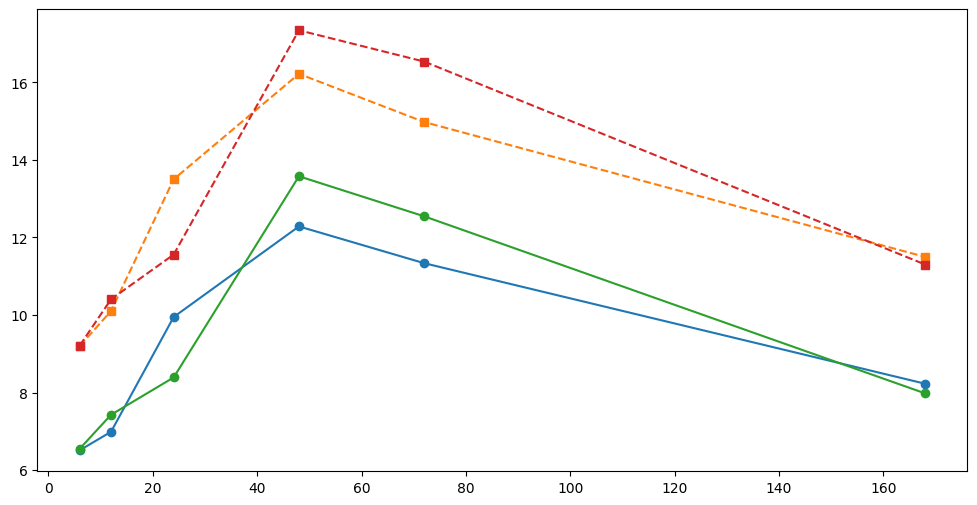

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.interpolate import interp1d

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir, r'data\donnees-historiques\prix\hourly_day_ahead_prices_2017_2020.parquet')

df = pd.read_parquet(file_path)

# Convertir la colonne date en index
df.index = pd.to_datetime(df.index)

# Sélectionner la colonne des prix
col_name = "price"
time_series = df[col_name].values.reshape(-1, 1)

# Normalisation des données
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series)

# Définition des horizons de prédiction
horizons = [6, 12, 24, 48, 72, 168]  # En heures

# Fonction pour créer des séquences temporelles
def create_sequences(data, horizon, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length - horizon):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length+horizon])
    return np.array(X), np.array(y)

# Définition des méthodes de Data Augmentation
def jittering(data, noise_level=0.05):
    noise = np.random.normal(0, noise_level * np.std(data), data.shape)
    return data + noise

def time_warping(data, sigma=0.2):
    orig_time = np.linspace(0, 1, len(data))
    random_offsets = np.random.normal(0, sigma, len(data))
    warped_time = np.clip(orig_time + random_offsets, 0, 1)
    interpolator = interp1d(warped_time, data.flatten(), kind='linear', fill_value='extrapolate')
    return interpolator(orig_time).reshape(-1, 1)

def window_slicing(data, window_size=0.8):
    start_idx = np.random.randint(0, len(data) - int(window_size * len(data)))
    end_idx = start_idx + int(window_size * len(data))
    return data[start_idx:end_idx]

# Définition du modèle LSTM
def build_lstm_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(50, return_sequences=True, input_shape=input_shape),
        tf.keras.layers.LSTM(50, return_sequences=False),
        tf.keras.layers.Dense(25),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate(X_train, y_train, X_test, y_test, method_name, horizon):
    print(f"\n🔹 Entraînement pour l'horizon {horizon}h avec la méthode {method_name}...")
    
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    mae = mean_absolute_error(y_test_inv, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))

    print(f"✅ {method_name} (Horizon {horizon}h) - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return mae, rmse

# Dictionnaire pour stocker les résultats
results = {method: {h: None for h in horizons} for method in ["Original", "Jittering", "Time Warping", "Window Slicing"]}

# Entraînement et évaluation pour chaque horizon
for horizon in horizons:
    # Séparation train/test
    train_size = int(len(time_series_scaled) * 0.8)
    train_data, test_data = time_series_scaled[:train_size], time_series_scaled[train_size:]

    # Création des séquences
    X_train, y_train = create_sequences(train_data, horizon)
    X_test, y_test = create_sequences(test_data, horizon)

    # Application des augmentations
    X_train_jittered = jittering(X_train)
    X_train_sliced = window_slicing(X_train)

    # Entraînement avec chaque méthode
    results["Original"][horizon] = train_and_evaluate(X_train, y_train, X_test, y_test, "Original", horizon)
    results["Jittering"][horizon] = train_and_evaluate(X_train_jittered, y_train, X_test, y_test, "Jittering", horizon)
    results["Window Slicing"][horizon] = train_and_evaluate(X_train_sliced, y_train[:len(X_train_sliced)], X_test, y_test, "Window Slicing", horizon)

# Génération des graphiques de comparaison
methods = list(results.keys())

plt.figure(figsize=(12, 6))
for method in methods:
    mae_values = [results[method][h][0] for h in horizons]
    rmse_values = [results[method][h][1] for h in horizons]

    plt.plot(horizons, mae_values, marker='o', label=f"MAE - {method}")
    plt.plot(horizons, rmse_values, marker='s', linestyle="dashed", label=f"RMSE - {method}")

plt.legend()
plt.xlabel("Horizon (heures)")
plt.ylabel("Erreur (MAE/RMSE)")
plt.title("Comparaison des performances des méthodes de Data Augmentation")
plt.grid()
plt.show()


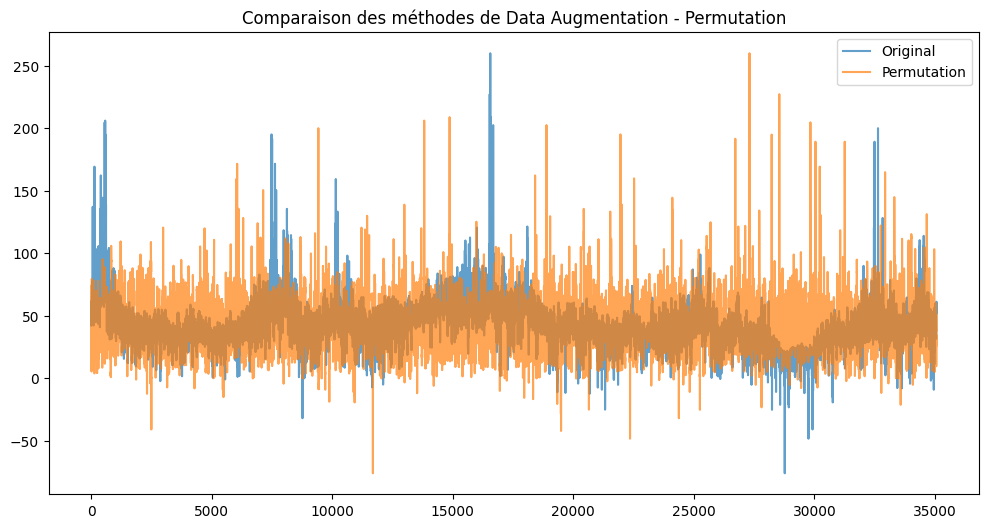

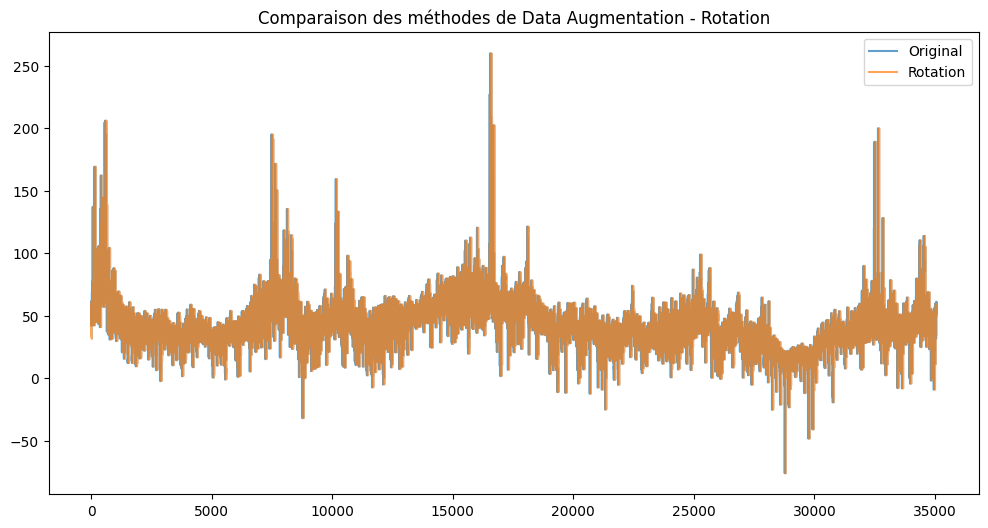

In [12]:

### 4️⃣ Permutation (Réorganisation aléatoire des segments)
def permutation(data, segment_size=10):
    num_segments = len(data) // segment_size
    segments = np.array_split(data[:num_segments * segment_size], num_segments)
    np.random.shuffle(segments)
    return np.concatenate(segments)

permuted_series = permutation(time_series)

### 5️⃣ Rotation (Décalage circulaire)
def rotation(data, shift=50):
    return np.roll(data, shift)

rotated_series = rotation(time_series)

# Visualization for Permutation
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original", alpha=0.7)
plt.plot(permuted_series, label="Permutation", alpha=0.7)
plt.legend()
plt.title("Comparaison des méthodes de Data Augmentation - Permutation")
plt.show()

# Visualization for Rotation
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original", alpha=0.7)
plt.plot(rotated_series, label="Rotation", alpha=0.7)
plt.legend()
plt.title("Comparaison des méthodes de Data Augmentation - Rotation")
plt.show()
